In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
anies = pd.read_csv('anies (2).csv', delimiter=";")
anies.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Jan 07 23:59:53 +0000 2024,1744146872342900893,@rizalhendra20 Woy buzzer anies minimal follba...,0,0,0,0,in,1318573679228248067,1743859943655268621,hiyahiyadi,https://twitter.com/hiyahiyadi/status/17441468...
1,Sun Jan 07 23:59:47 +0000 2024,1744146847986532734,Kenapa Pak Ganjar terlihat firm banget semalam...,0,0,1,1,in,1352115360762236929,1744137019843092606,DokFun,https://twitter.com/DokFun/status/174414684798...
2,Sun Jan 07 23:59:40 +0000 2024,1744146815434559687,@DokterTifa @aniesbaswedan Apa yg dikatakan An...,0,0,0,0,in,1736204790139691008,1744135720233832607,Aam474200Andi,https://twitter.com/Aam474200Andi/status/17441...
3,Sun Jan 07 23:59:38 +0000 2024,1744146807083708566,@SetiawatiFanny1 @MurtadhaOne1 Mau di ngomongn...,0,0,0,0,in,65380709,1744018911027409081,faridb212,https://twitter.com/faridb212/status/174414680...
4,Sun Jan 07 23:59:37 +0000 2024,1744146804609024103,@sugarcatch you mean politik identitas? on whi...,0,1,0,0,en,1199899021,1744130995119677532,peachofsheet,https://twitter.com/peachofsheet/status/174414...


In [ ]:
anies = anies[['full_text']]
anies.head()

,full_text
0,@rizalhendra20 Woy buzzer anies minimal follba...
1,Kenapa Pak Ganjar terlihat firm banget semalam...
2,@DokterTifa @aniesbaswedan Apa yg dikatakan An...
3,@SetiawatiFanny1 @MurtadhaOne1 Mau di ngomongn...
4,@sugarcatch you mean politik identitas? on whi...


In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create a stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Create a StopWordRemover with default stopwords
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Define additional stopwords
more_stopwords = ['https', 'anies', 'pak', 'capres', 'presiden', 'imin', 'cak', 'baswedan', 'aniesbaswedan']

# Assuming you already have the 'anies' DataFrame
anies['cleaned_text'] = anies['full_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in stopword_remover.remove(x).split() if word.lower() not in more_stopwords]))
anies['cleaned_text'].head()

0        rizalhendra20 woy buzzer minimal follback lah
1    kenapa ganjar lihat firm banget malam karena b...
2    doktertifa aniesbaswedan apa yg kata benar ada...
3    setiawatifanny1 murtadhaone1 mau ngomongnya ba...
4    sugarcatch you mean politik identitas on which...
Name: cleaned_text, dtype: object

In [ ]:
anies = anies[['cleaned_text']]
anies.head()

,cleaned_text
0,rizalhendra20 woy buzzer minimal follback lah
1,kenapa ganjar lihat firm banget malam karena b...
2,doktertifa aniesbaswedan apa yg kata benar ada...
3,setiawatifanny1 murtadhaone1 mau ngomongnya ba...
4,sugarcatch you mean politik identitas on which...


In [ ]:
pip install transformers

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load the sentiment analysis pipeline
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Function to apply sentiment analysis to each row in the 'cleaned_text' column
def analyze_sentiment(text):
    result = sentiment_analysis(text)
    label = label_index[result[0]['label']]
    score = result[0]['score']
    return pd.Series({'sentiment_label': label, 'sentiment_score': score})

# Apply sentiment analysis to 'cleaned_text' column
anies[['sentiment_label', 'sentiment_score']] = anies['cleaned_text'].apply(analyze_sentiment)

# Display the results
anies[['cleaned_text', 'sentiment_label', 'sentiment_score']]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,cleaned_text,sentiment_label,sentiment_score
0,rizalhendra20 woy buzzer minimal follback lah,neutral,0.974686
1,kenapa ganjar lihat firm banget malam karena b...,negative,0.997251
2,doktertifa aniesbaswedan apa yg kata benar ada...,negative,0.948249
3,setiawatifanny1 murtadhaone1 mau ngomongnya ba...,negative,0.997059
4,sugarcatch you mean politik identitas on which...,neutral,0.670588
...,...,...,...
783,kalo soal food estate emg gag instan yg instan...,negative,0.991895
784,cnnindonesia pilih buat pilpres 2024 nanti ind...,positive,0.979828
785,waterspinachboy txtdarihi hi tu gak cuma ancam...,positive,0.655167
786,cnnindonesia mampu laku ubah sama rakyat layan...,neutral,0.432236


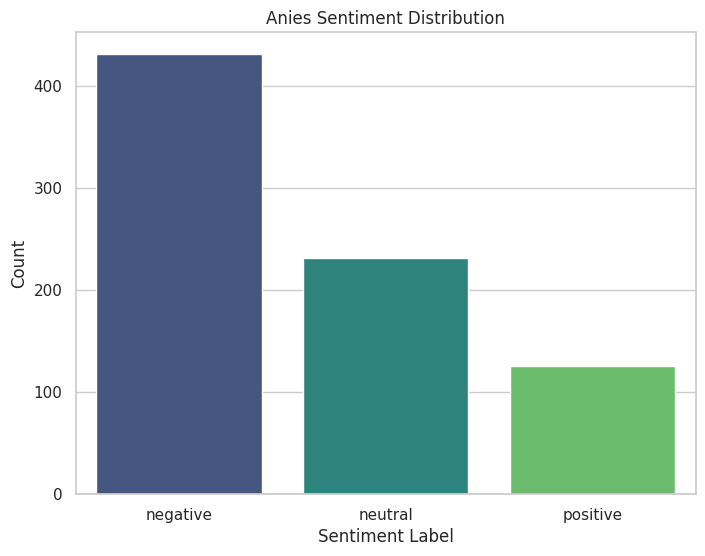

In [ ]:
# Count the occurrences of each sentiment label
sentiment_counts = anies['sentiment_label'].value_counts()

# Plot a bar chart using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Anies Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [ ]:
anies_positive = anies[anies['sentiment_label'] == 'positive']
anies_positive.head()

,cleaned_text,sentiment_label,sentiment_score
11,partaisocmed benar sih lebih banyak likes ny b...,positive,0.496914
23,inga inga kasus ahok yg kalah pilgub dki jkt y...,positive,0.495441
24,svteady orang pintar pilih,positive,0.951751
30,kegblgnunfaedh idextratime,positive,0.482502
33,aniesbaswedan tadi malam tonton seluruh rakyat...,positive,0.575509


In [ ]:
anies_neutral = anies[anies['sentiment_label'] == 'neutral']
anies_neutral.head()

,cleaned_text,sentiment_label,sentiment_score
0,rizalhendra20 woy buzzer minimal follback lah,neutral,0.974686
4,sugarcatch you mean politik identitas on which...,neutral,0.670588
7,partaisocmed https t co hmojja0cey,neutral,0.990043
9,rasyidfaris12 kumpar hipohan ganjarpranowo baik,neutral,0.955436
13,keluarga besar nahdlatul ulama nu deklarasi du...,neutral,0.997701


In [ ]:
anies_negative = anies[anies['sentiment_label'] == 'negative']
anies_negative

,cleaned_text,sentiment_label,sentiment_score
1,kenapa ganjar lihat firm banget malam karena b...,negative,0.997251
2,doktertifa aniesbaswedan apa yg kata benar ada...,negative,0.948249
3,setiawatifanny1 murtadhaone1 mau ngomongnya ba...,negative,0.997059
5,sembroenoo msaid didu anies,negative,0.488589
6,lupamaupostapa halo kak sampai bukan personal ...,negative,0.880877
...,...,...,...
779,cryptorecceh drevachaniago aniesbaswedan tv mu...,negative,0.758761
781,fahrihamzah kasi sm prabowo sampe nolak salam ...,negative,0.478569
782,dennysiregar7 saking ngambek nya ampe ga mau s...,negative,0.993415
783,kalo soal food estate emg gag instan yg instan...,negative,0.991895


# Wordcloud

In [ ]:
import re

# Assuming you have the 'anies' DataFrame with the 'cleaned_text' column
anies_all = ' '.join(anies['cleaned_text'].astype(str))

# Define your custom stopwords
custom_stopwords = ['anies', 'baswedan', 'tweet', 'yg', 'debat', 'tanya', 'jawab', 'capres', 'aniesbaswedan', 'https', 't', 'co', 'prabowo', 'ganjar', 'jadi', 'sama', 'aja', 'ga', 'gak']

# Add custom stopwords to the concatenated text
for stopword in custom_stopwords:
    anies_all = re.sub(r'\b' + re.escape(stopword) + r'\b', '', anies_all)

# Print or use the modified text as needed
print(anies_all)

rizalhendra20 woy buzzer minimal follback lah kenapa  lihat firm banget malam karena bawa data begitu data cuma lawan pake retorika omon-omon yha bantai lah  doktertifa  apa  kata benar ada sumber jokowi  bukan imajinasi fiksi fakta dasar jelas orang presiden setiawatifanny1 murtadhaone1 mau ngomongnya bangsat bacot   udh jd contoh   baik krn di ruang dlm forum resmi dg suara keras kalau dukung  pancing gimana  sugarcatch you mean politik identitas on which election pilkada i dont think i ever found any evidence that backs up the politik identitas accusation has shown pluralist intention by giving the most permits to places of worship during his period tho    id59na9fqy sembroenoo msaid didu  lupamaupostapa halo kak sampai bukan personal ibarat uji bagaimana kerja menhan apa bijak   buat lama hampir 5 tahun ini  rendah juga harus prabwo tinggal  dan ban memang  kerja partaisocmed    hmojja0cey hmm turut engga sih bukan nyerang personal tp lebih jabat  emban ps blio hrs dong nunjukin ha

In [ ]:
import re

# Assuming you have the 'anies' DataFrame with the 'cleaned_text' column
anies_positive_2 = ' '.join(anies_positive['cleaned_text'].astype(str))

# Define your custom stopwords
custom_stopwords = ['anies', 'baswedan', 'tweet', 'yg', 'debat', 'tanya', 'jawab', 'capres', 'aniesbaswedan', 'https', 't', 'co', 'prabowo', 'ganjar', 'jadi', 'sama', 'aja', 'ga', 'gak']

# Add custom stopwords to the concatenated text
for stopword in custom_stopwords:
    anies_positive_2 = re.sub(r'\b' + re.escape(stopword) + r'\b', '', anies_positive_2)

# Print or use the modified text as needed
print(anies_positive_2)

partaisocmed benar sih lebih banyak likes ny but still  why does it matter none of them are influencers inga inga kasus ahok  kalah pilgub dki jkt yusuf wanadi yakin bawa  calon para bohir akan laku apa untuk itu tapi tuhan kata dan tetap lenggang ikut konstentasi calon  svteady orang  pintar  pilih   kegblgnunfaedh idextratime  tadi malam tonton seluruh rakyat indonesia nir-etika etika lebih tepat tidak tahu malu  calon amp bantu banyak dalam pilgub dki anda tonton karakter anda  nyata shame on you  memang keren deh mah emang gada dua bukti kan  malam slalu   kompeten    4huhdwqyfc selalu tunjuk layak mimpin indonesia bukti  malam ini    7ghlf1fhwr faizalassegaf presiden 1 amin aminajadulu makin pede deh poko  pa selalu buat rakyat kagum  muas    nytfauyoum gue kok jg dpt kesan strategi between  and  they both beberapa kali kalau sering rasa saling paham dgn  satu  dan bikin posisi sudut main mental rupa  tengah empatt kupinglalat irwndfrry tapi kalo  lihat quotable  asa pedas awal ef

In [ ]:
import re

# Assuming you have the 'anies' DataFrame with the 'cleaned_text' column
anies_neutral_2 = ' '.join(anies_neutral['cleaned_text'].astype(str))

# Define your custom stopwords
custom_stopwords = ['anies', 'baswedan', 'tweet', 'yg', 'debat', 'tanya', 'jawab', 'capres', 'aniesbaswedan', 'https', 't', 'co', 'prabowo', 'ganjar', 'jadi', 'sama', 'aja', 'ga', 'gak']

# Add custom stopwords to the concatenated text
for stopword in custom_stopwords:
    anies_neutral_2 = re.sub(r'\b' + re.escape(stopword) + r'\b', '', anies_neutral_2)

# Print or use the modified text as needed
print(anies_neutral_2)

rizalhendra20 woy buzzer minimal follback lah sugarcatch you mean politik identitas on which election pilkada i dont think i ever found any evidence that backs up the politik identitas accusation has shown pluralist intention by giving the most permits to places of worship during his period tho    id59na9fqy partaisocmed    hmojja0cey rasyidfaris12 kumpar hipohan ganjarpranowo baik keluarga besar nahdlatul ulama nu deklarasi dukung paslon nomor urut 1 muhaimin iskandar cak imin pilpres 2024    d1tcadtugn         debatpilpres martabakmnizz brobroronto poligelud ai iap lah emang gitu kan konsep kelas   liat gooogle buat gali fakta thestra82420837 prisha7849 lanlan2345 briankhrisna kerja udh paling bagus kah banyak buku hitam tentang    myvgorlbx5 maju terus memang sosok pimpin harap bangsa    a6chf7ntfi begitu  mau salam  abah     j5xbxuber3 indonesia memang butuh pimpin kayak     rm00wln50m intip closing statement  tiga 2024 singgung 2 penting - lombok insider    wronyahhej selamat pagi

In [ ]:
import re

# Assuming you have the 'anies' DataFrame with the 'cleaned_text' column
anies_negative_2 = ' '.join(anies_negative['cleaned_text'].astype(str))

# Define your custom stopwords
custom_stopwords = ['anies', 'baswedan', 'tweet', 'yg', 'debat', 'tanya', 'jawab', 'capres', 'aniesbaswedan', 'https', 't', 'co', 'prabowo', 'ganjar', 'jadi', 'sama', 'aja', 'ga', 'gak', 'bukan', 'apa', 'mau', 'ini', 'orang', 'kalau', 'nya']

# Add custom stopwords to the concatenated text
for stopword in custom_stopwords:
    anies_negative_2 = re.sub(r'\b' + re.escape(stopword) + r'\b', '', anies_negative_2)

# Print or use the modified text as needed
print(anies_negative_2)

kenapa  lihat firm banget malam karena bawa data begitu data cuma lawan pake retorika omon-omon yha bantai lah  doktertifa    kata benar ada sumber jokowi   imajinasi fiksi fakta dasar jelas  presiden setiawatifanny1 murtadhaone1  ngomongnya bangsat bacot   udh jd contoh   baik krn di ruang dlm forum resmi dg suara keras  dukung  pancing gimana  sembroenoo msaid didu  lupamaupostapa halo kak sampai  personal ibarat uji bagaimana kerja menhan  bijak   buat lama hampir 5 tahun   rendah juga harus prabwo tinggal  dan ban memang  kerja hmm turut engga sih  nyerang personal tp lebih jabat  emban ps blio hrs dong nunjukin hasil kerja  bertanggungjawab atas itu karena tahan  baik hrs mulai dr pimpin  integritas  hasil pancing wowo gni mas  mas  wkwkwk  paslon 1 blunder wowo keren arab omon let him cook debatcapres el chef indonesia absent no more blunder menhan    gloslydl4i jilulisme masih ketar tir ngomong begini sammsularifinme txtdarihi muter muter ngomong sm km pdahal fakta bicara kemari

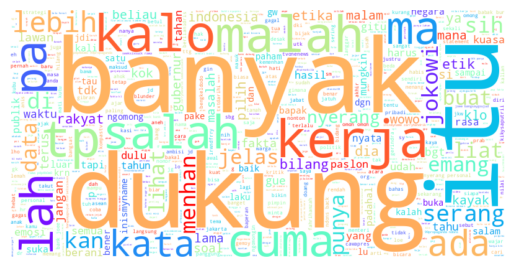

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_words=1000, width=800, height=400, colormap="rainbow")

wordcloud.generate(anies_negative_2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


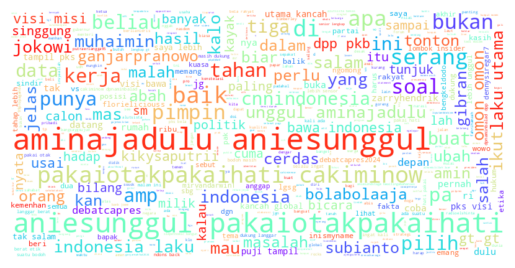

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_words=1000, width=800, height=400, colormap="rainbow")

wordcloud.generate(anies_neutral_2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


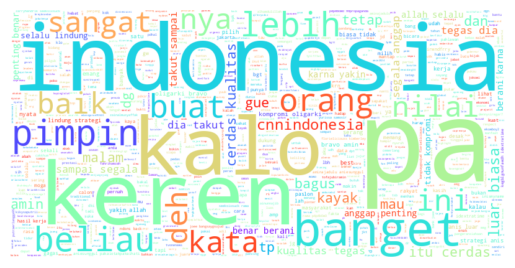

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_words=1000, width=800, height=400, colormap="rainbow")

wordcloud.generate(anies_positive_2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

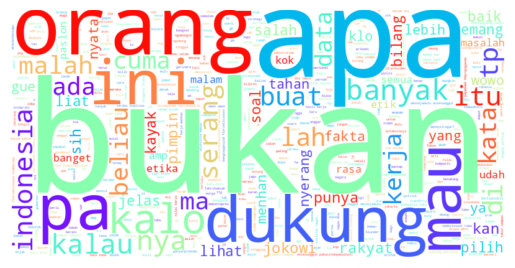

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_words=1000, width=800, height=400, colormap="rainbow")

wordcloud.generate(anies_all)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()